# Forecasting traffic on JetRail for next 7 months(Part1)
 
JetRail is a jet propulsion technology to run rails and move people at high speed. 
Unicorn Investers are paying attention to these tech recently, but investment would only makes sense if the JetRail can transport more than 1 million users within the next 18 months. 

As a data scientist, you have to give an insight to Investors by developing forcasting algorithm as reliable as possible. You have to prove your model performance by validating users in the next 7 months.

#Part1 : EDA and hands-on process

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
#import function parse to date colums to be parsed as a date field.
import seaborn as sns
sns.set()#Setting seaborn as default style even if use only matplotlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [59]:
df=pd.read_csv("drive/MyDrive/2022교안/고차원시계열/JetRail/Train.csv", parse_dates=["Datetime"], dayfirst=True)
df.columns
print(type(df.Datetime))
print(type(df.Count))
df.dtypes
df.head(24)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
5,5,2012-08-25 05:00:00,2
6,6,2012-08-25 06:00:00,2
7,7,2012-08-25 07:00:00,2
8,8,2012-08-25 08:00:00,6
9,9,2012-08-25 09:00:00,2


Creating variables from Datetime


In [60]:
min(df.Count);max(df.Count)
df.dtypes
Weekdays=df.Datetime.dt.weekday
df['Weekdays']=Weekdays
Weekdays.unique
print(df.head(2))
'''
Datetime=df.Datetime
Datetime=pd.to_datetime(Datetime)
Woche=Datetime.dt.dayofweek
Woche.unique()
df.Woche=Woche
'''
Conditions=[
    (df.Weekdays==0),
    (df.Weekdays==1),
    (df.Weekdays==2),
    (df.Weekdays==3),
    (df.Weekdays==4),
    (df.Weekdays==5),
    (df.Weekdays==6)
]
Values=["Mon", "Dien", "Mit", "Don", "Frei", "Sam", "Son"]
df["Weekdays2"]=np.select(Conditions, Values, default="null")
df["Month"]=df.Datetime.dt.month
df["Day"]=df.Datetime.dt.day
df["Year"]=df.Datetime.dt.year
df["weekofyear"]=df.Datetime.dt.weekofyear
df["Hour"]=df.Datetime.dt.time
df.columns;df.head(1)
df=df.loc[:, ["Datetime", "Count", "Weekdays2", "Month", "Day", "Year", "weekofyear", 'Hour']]
df.columns;df.head(1)

   ID            Datetime  Count  Weekdays
0   0 2012-08-25 00:00:00      8         5
1   1 2012-08-25 01:00:00      2         5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,Datetime,Count,Weekdays2,Month,Day,Year,weekofyear,Hour
0,2012-08-25,8,Sam,8,25,2012,34,00:00:00


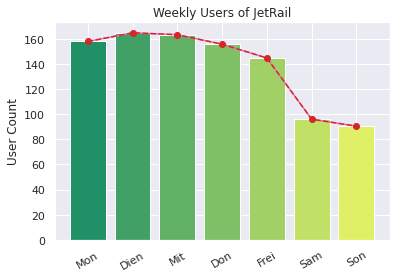

In [5]:
df_mean=df.loc[:, "Count"].groupby(df.Weekdays2).mean()
df_mean=df_mean.loc[["Mon", "Dien", "Mit", "Don", 'Frei', "Sam", "Son"]]
#______Plot______________
plt.plot(df_mean.index, df_mean, color="tab:pink")
plt.xticks(rotation=30)
plt.title("Weekly Users of JetRail")
plt.ylabel("User Count")

#-------Boxplot-------------------
plt.bar(df_mean.index, df_mean, color="tab:blue")
plt.title("Bar plot of Weekly Users on JetRails")
plt.xticks(rotation=30)

#---------Mix---------------
xtick_label_position=list(range(len(Values)))
plt.xticks(xtick_label_position, df_mean.index)
plt.bar(xtick_label_position, df_mean, 
        color=sns.color_palette("summer", len(Values)))
plt.plot(xtick_label_position, df_mean,
         color="tab:red", linestyle="--", marker="o")
plt.title("Weekly Users of JetRail")
plt.show()

Text(0.5, 1.0, 'Timely Users by mean')

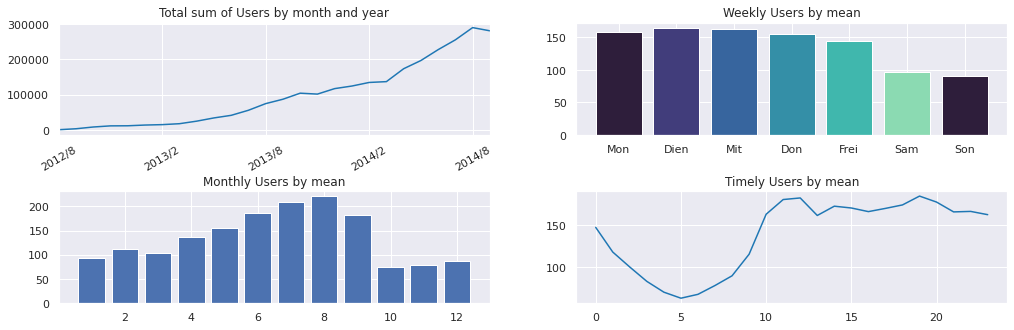

In [6]:
plt.figure(figsize=(17,5))
df_Year=df.loc[:, "Count"].groupby([df.Year, df.Month]).sum()
ax1=plt.subplot(2, 2, 1)
Idx=[(str(i)+"/"+str(j)) for i, j in df_Year.index]
ax1.plot(Idx, df_Year, color="tab:blue")
xticks1=ax1.get_xticks()
ax1.set_xticks(xticks1[::len(xticks1)//4])
ax1.tick_params(axis='x', rotation=30)
#current_values=ax1.gca().get_yticks()
#ax1.gca().set_yticks(['{:,.0f}'.format(x) for x in current_values])
ax1.set_title("Total sum of Users by month and year")
ax1.margins(x=0)

df_mean=df.loc[:, "Count"].groupby(df.Weekdays2).mean()
df_mean=df_mean.loc[["Mon", "Dien", "Mit", "Don", 'Frei', "Sam", "Son"]]
ax2=plt.subplot(2,2,2)
ax2.bar(Values, df_mean, color=sns.color_palette("mako"))
ax2.set_title("Weekly Users by mean")

df_mean2=df.loc[:, "Count"].groupby(df.Month).mean()
ax3=plt.subplot(2,2,3)
ax3.bar(df_mean2.index, df_mean2)
ax3.set_title("Monthly Users by mean")
plt.subplots_adjust(left=0.125, bottom=0.1, hspace=0.5, wspace=0.2)

df_mean4=df.loc[:, "Count"].groupby(df.Hour).mean()
ax4=plt.subplot(2,2,4)
ax4.plot(list(range(0, 24)), df_mean4, color="tab:blue")
ax4.set_title("Timely Users by mean")


Text(0.5, 1.0, 'Weekly Boxplot')

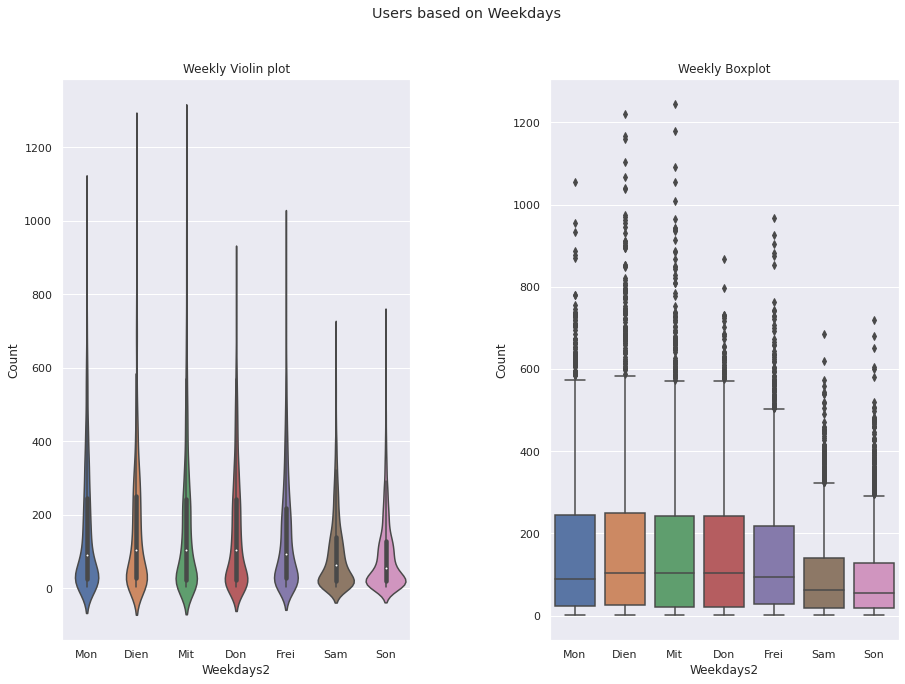

In [7]:
fig, axes=plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Users based on Weekdays")

sns.violinplot(ax=axes[0], data=df, x="Weekdays2", y="Count", 
               order=["Mon", "Dien", "Mit", "Don", "Frei", "Sam", "Son"])
axes[0].set_title("Weekly Violin plot")

plt.subplots_adjust(left=0.125, bottom=0.1,  wspace=0.4)

sns.boxplot(ax=axes[1], data=df, x="Weekdays2", y='Count', 
            order=["Mon", "Dien", "Mit", "Don", "Frei", "Sam", "Son"])
axes[1].set_title("Weekly Boxplot")

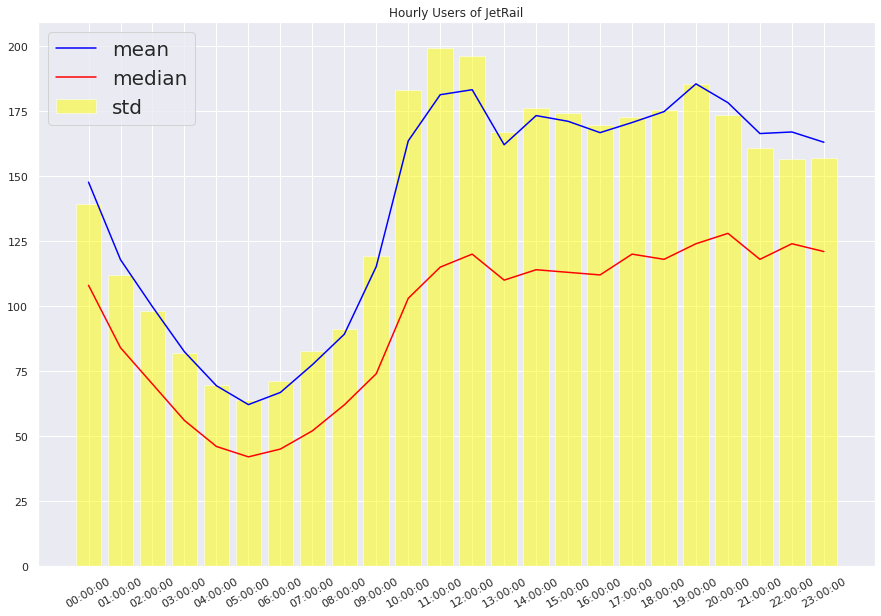

In [8]:
df_hour=df.groupby("Hour").agg({"Count":["mean", "median", "std"]})
df_hour.columns
df_hour.columns.get_level_values(0)
df_hour.columns.get_level_values(1)
df_hour.columns=df_hour.columns.droplevel(0)

plt.figure(figsize=(15, 10))
plt.grid(True)
xtick_label_position=list(range(len(df_hour.index)))
plt.xticks(xtick_label_position, df_hour.index)
plt.plot(xtick_label_position, df_hour.loc[:, "mean"], color="blue", label="mean")
plt.plot(xtick_label_position, df_hour.loc[:, "median"], color='red', label="median")
plt.bar(xtick_label_position, df_hour.loc[:, "std"], label="std", alpha=0.5, color="yellow")
plt.title("Hourly Users of JetRail")
plt.legend(loc="upper left", fontsize=20)
plt.tick_params(axis="x", rotation=30)
plt.show()

In [9]:
years=df_Year.index.get_level_values(0)
month=df_Year.index.get_level_values(1)
df_Year.index=list(range(len(years)))
df_Year2=pd.DataFrame({"Count":df_Year, "years":years, "month":month})

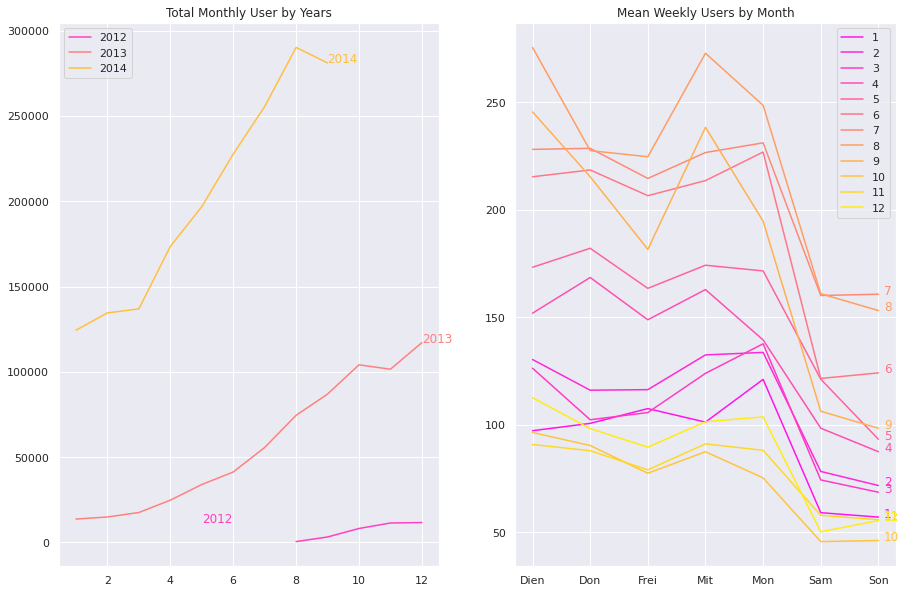

In [10]:
plt.figure(figsize=(15, 10))
colors=sns.color_palette("spring", 3)
years_unique=list(set(years))
ax1=plt.subplot(1, 2, 1)
for i, y in enumerate(years_unique):
  ax1.plot("month", "Count", data=df_Year2.loc[df_Year2.years==y, :], color=colors[i], label=y)
  ax1.text(df_Year2.loc[df_Year2.years==y, :].shape[0], df_Year2.loc[df_Year2.years==y, "Count"][-1:].values[0],  y, color=colors[i])
ax1.legend(loc="upper left")
ax1.set_title("Total Monthly User by Years")
ax1.grid(True)

df_Monthweek=df.loc[:, "Count"].groupby([df.Month, df.Weekdays2]).mean()
month=df_Monthweek.index.get_level_values(0)
weekday=df_Monthweek.index.get_level_values(1)
df_Monthweek.index=list(range(len(month)))
df_Monthweek2=pd.DataFrame({"mean":df_Monthweek, "month":month, "weekday":weekday})
month_unique=list(set(month))
colors=sns.color_palette("spring", len(month_unique))
ax2=plt.subplot(1, 2, 2)
for i, y in enumerate(month_unique):
  ax2.plot("weekday", "mean", data=df_Monthweek2.loc[df_Monthweek2.month==y, :], color=colors[i], label=y)
  ax2.text(df_Monthweek2.loc[df_Monthweek2.month==y, :].shape[0]-.9, df_Monthweek2.loc[df_Monthweek2.month==y, "mean"][-1:].values[0], y, color=colors[i])
ax2.legend(loc="upper right")
ax2.set_title("Mean Weekly Users by Month")
ax2.grid(True)
plt.show()


# Trend and Seasonality removal


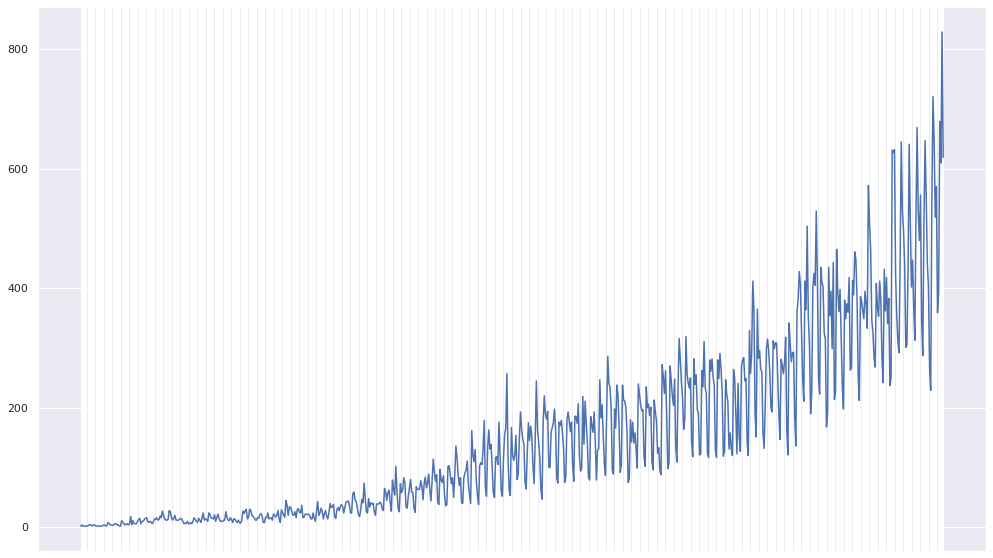

In [61]:
df2=df.groupby([df.Year, df.Month, df.Day]).agg({"Count":["mean", "median", "std"]})
df2.columns=df2.columns.droplevel(0)
idx=[str(i)[0:10] for i in df.Datetime]
df2.index=idx[::24]

plt.figure(figsize=(17, 10))
plt.plot(df2.loc[:, "median"])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title("original data-increasing variance")
plt.show()

There are increasing trend and variance ae well. However the serious feature in the plot is increasing variance. <br>
To fix this problem, you can use simple linear transformation techniques. <br>
I'll use log transformation. <br>

In [51]:
df2.columns

Index(['mean', 'median', 'std'], dtype='object')

In [65]:
df2['mean']=np.log(df2['mean'])

In [66]:
df2['median']=np.log(df2['median'])

In [67]:
df2.head

<bound method NDFrame.head of                 mean    median         std
2012-08-25  1.152680  0.693147    1.948615
2012-08-26  1.299283  1.386294    1.833663
2012-08-27  0.949081  0.693147    1.100066
2012-08-28  0.882389  0.693147    0.829702
2012-08-29  0.916291  0.693147    1.063219
...              ...       ...         ...
2014-09-21  5.938196  5.973810  178.767580
2014-09-22  6.377010  6.520621  237.931606
2014-09-23  6.317766  6.413459  197.115430
2014-09-24  6.554408  6.720220  333.745369
2014-09-25  6.379557  6.428105  130.824365

[762 rows x 3 columns]>

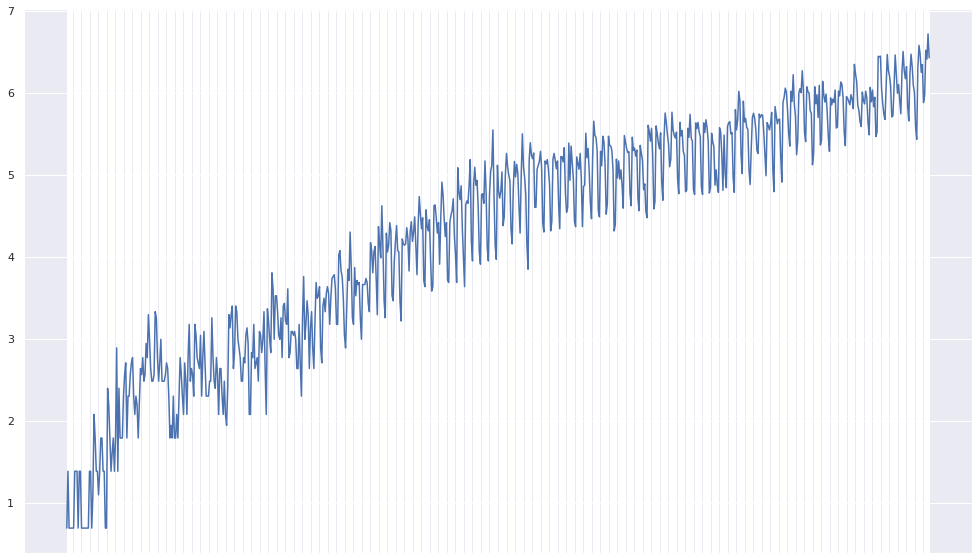

In [68]:
plt.figure(figsize=(17, 10))
plt.plot(df2.loc[:, "median"])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title("log-transformation")
plt.show()

Now, let's focuse on detrend.
## Detrend
### 1. Differencing
*Y[t] = X[t] - X[t-1]*\
This is a typical intuitive way to detrend the data. 


In [69]:
df2_det1=df2.diff(axis=0)
print(df2_det1)

                mean    median         std
2012-08-25       NaN       NaN         NaN
2012-08-26  0.146603  0.693147   -0.114953
2012-08-27 -0.350202 -0.693147   -0.733597
2012-08-28 -0.066691  0.000000   -0.270364
2012-08-29  0.033902  0.000000    0.233517
...              ...       ...         ...
2014-09-21  0.106069  0.090487   81.377323
2014-09-22  0.438815  0.546812   59.164026
2014-09-23 -0.059244 -0.107162  -40.816176
2014-09-24  0.236642  0.306761  136.629939
2014-09-25 -0.174851 -0.292115 -202.921003

[762 rows x 3 columns]


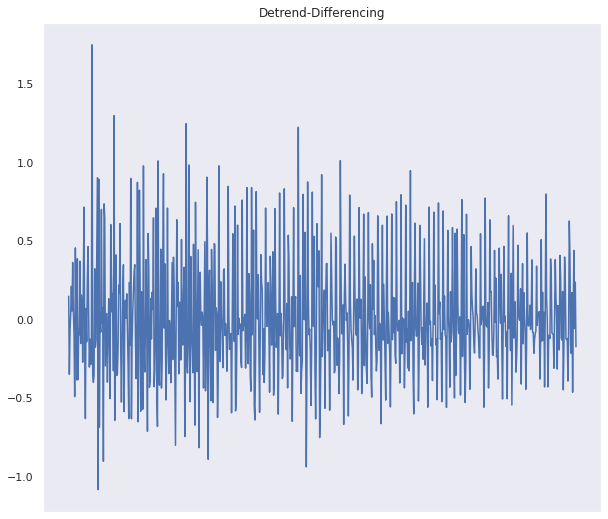

In [70]:
plt.figure(figsize=(10, 9))
plt.plot(df2_det1.loc[:, "mean"])
plt.title("Detrend-Differencing")
plt.tick_params(axis='x',
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
plt.grid(False)


### 2. Polynomial regression
From the time series plot, we can think of linear on quadratic line to fit. \
multiple regression is expressed in formula:\
Y = βX + E \
(Y is response matrix, JetRail Users,\
βis coeffienct vector, X is explanatory matrix,\
E is error matrix, ~N(0, sigma) or ~WN(0, sigma)) \

βis calculated by:

```
β= np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)), np.matmul(np.transpose(X),Y))
#or
β= np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@Y
```

Then, the fitted value vector in formula: \


```
Y_hat=np.matmul(X, β)
```



In [71]:
idx_0=np.repeat(1, df2.shape[0])
idx_1=np.array(list(range(1,df2.shape[0]+1)))
idx_2=pow(idx_1, 2)
Xlin=np.transpose(np.array((idx_0, idx_1)))
Xquad=np.transpose(np.array((idx_0, idx_1, idx_2)))
Y=df2.loc[:, "median"].values

np.linalg.det(np.transpose(Xlin)@Xlin) #let's check if the determinant is 0, which means the matrix is singular and doesn't have a inverse matrix.
beta_lin=np.matmul(np.linalg.inv(np.matmul(np.transpose(Xlin),Xlin)), np.matmul(np.transpose(Xlin),Y))
Y_hat_lin=np.matmul(Xlin, beta_lin)

beta_quad=np.matmul(np.linalg.inv(np.matmul(np.transpose(Xquad),Xquad)), np.matmul(np.transpose(Xquad),Y))
Y_hat_quad=np.matmul(Xquad, beta_quad)


Text(0.5, 1.0, 'Detrend-quadratic regression')

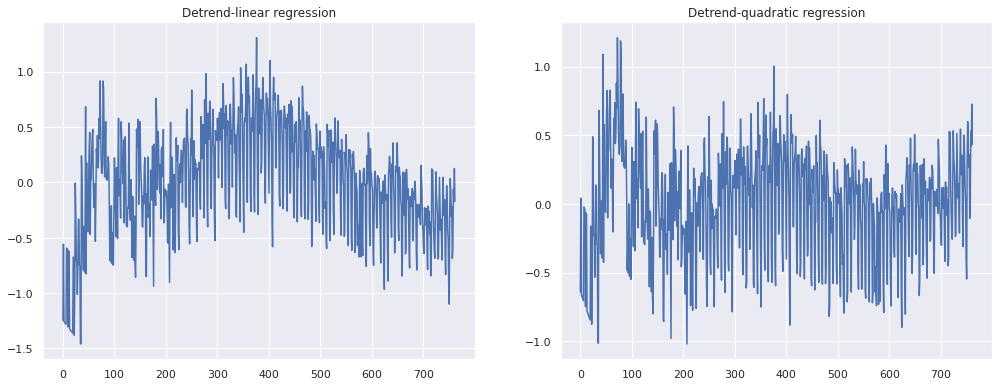

In [72]:
plt.figure(figsize=(17, 6))
ax1=plt.subplot(1, 2, 1)
ax1.plot(Y-Y_hat_lin)
ax1.set_title("Detrend-linear regression")

plt.subplots_adjust(left=0.125, bottom=0.1, hspace=0.5)
ax2=plt.subplot(1, 2, 2)
ax2.plot(Y-Y_hat_quad)
ax2.set_title("Detrend-quadratic regression")


### 3. MA filter
Moving Average is also popular method.\
You can leverage statsmodels.tsa.seasonal.seasonal_decompose function which is mean MA filter.<br>
https://www.statsmodels.org/v0.10.1/_modules/statsmodels/tsa/seasonal.html#seasonal_decompose <br>
With the link above, you can learn how the function works.<br>
The default function is : <br>
*Y[n]=filt[0]*X[n- n_filt/2] + ... + filt[n_filt/2]* X[n] + ... + filt[n-n_filt/2]*X[n+ n_filt/2]*

where filt is convolution filter and n_filt is length of convolution filter.
the default setting for convolution filter is 
```
np.repreat(1./freq, freq)
```
where freq is calulated by  
```
_pandas_wrapper , pfreq=_maybe_get_pandas_wrapper_freq(x) 
pfreq=freq_to_period(pfreq)
freq=pfreq
```

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul=seasonal_decompose(df2.loc[:, "median"].values, model="additive")
detrended=df2.loc[:, "median"].values - result_mul.trend
plt.plot(detrended)
plt.title("Detrend-MA")

## Deseasonalize
We have detrended data by differencing method. Now, we need to figure out the strong seasonality in the data. \
To find the seasonality, we have to chech the auto-correlation plot and partial auto-correlation plot. We'll just look at lags maximum 50, because auto-correlation score is repeated on same distance. \

In the acf plot, there is strong correlation in lag 7 mutiples.

And we need to look at partial auto-correlation plot which removes the hidden effect between the data point and lags. \

If ACF and PACF declines instantly, then our data is likely to be a stationary model which doesn't require modeling. \
If ACF declines gradually and PACF drops instantly, Auto Regressive model is appropriate. \
If ACF drops instantly and PACF drops gradually, Moving Average model is fine. \
If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average model (ARMA)



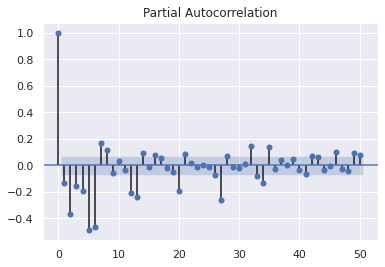

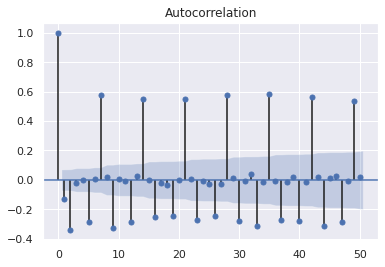

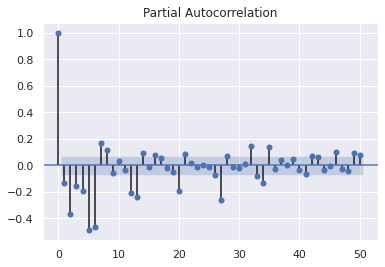

In [73]:
plot_acf(df2_det1.iloc[1:, 1], lags=50)
plot_pacf(df2_det1.iloc[1:, 1], lags=50)

high ACF and PACF in 7 multiples means there is weekly correlation in data.

So, how to deseasonalize? <br>
### 1. Seasonal soothing
Take a moving average with length as the seasonal window. This will smoothen in series in the process.

### 2. Seasonal differencing 
subtract the value of previous season from current value. <br>
Be aware that seasonal differencing include trend differencing of order 1. Therefore, in practice, if the trend is quadratic, first order differencing is applied. <br>
*(1-B^d)=(1-B)(1+B+...+B^(d-1))*

### 3. Harmonic regression


In [95]:
#seasonal differencing
df2_det1_t=np.array(list(df2_det1.iloc[1:756, 1]))
df2_det1_t7=np.array(list(df2_det1.iloc[7:, 1]))
df2_det1_sn7=df2_det1_t7-df2_det1_t

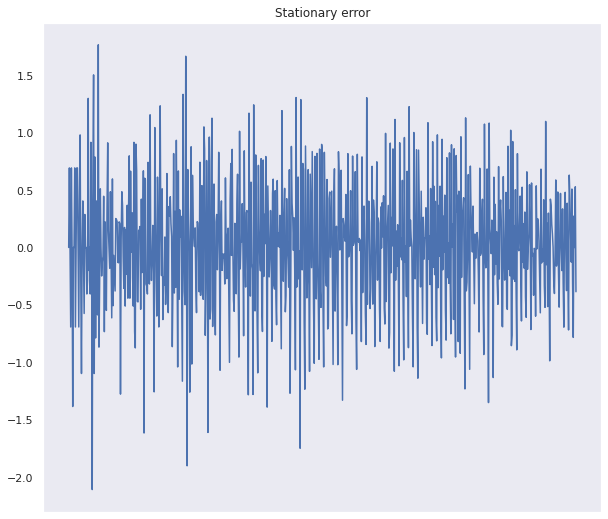

In [99]:
plt.figure(figsize=(10, 9))
plt.plot(df2_det1_sn7)
plt.title("Stationary error")
plt.tick_params(axis='x',
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
plt.grid(False)

## Test of residuals

We have removed trend and seasonality and the remaining residuals are stationary process. In particular, we want to know whether it is IID/WN or not. <br>
1. Portmanteau test
2. Turning point test
3. Differencing sign test
4. Rank test
5. Scatter plot

Normal test
1. QQ plot
2. Jarque-Bera test


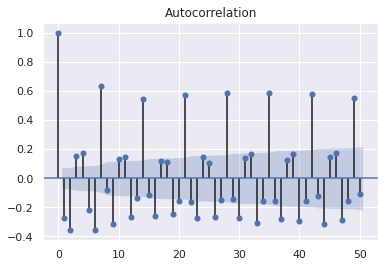

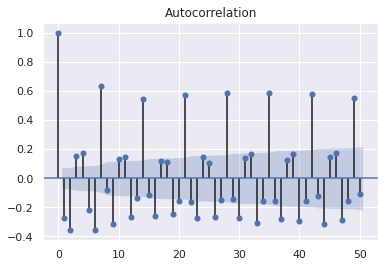

In [102]:
plot_acf(df2_det1_sn7, lags=50)

In [ ]:
from datetime import datetime, timedelta

time1=datetime(2022, 9, 17, 18, 23)
time2=datetime.now()
print(time1)
print(time2)
print((time1-time2).days, "일")
print("Nach den funf Tagen")
print(time2+timedelta(days=5))
print("Vor den Drei Tagen")
print(time2+timedelta(days=-3))
print(time1.weekday())#weekday() 0 ist der Montag und 6 ist am Ende, Sonntag

dates=df.loc[0:100, "Datetime"]
print(pd.Timestamp(datetime.now()))

print("-----------------")
print("pandas Timestamp Ubung")
print("-----------------")
print("pandas Timestamp: ", dates.iloc[0])
print("Jahr: ", dates.iloc[0].year)
print("Monat: ", dates.iloc[0].month_name())
print("Tag: ", dates.iloc[0].day)
print("Stunde: ", dates.iloc[0].hour)
print("Minute: ", dates.iloc[1].minute)
print("Sekunde: ", dates.iloc[0].second)
print("Woche: ", Wochen[1+dates.iloc[0].dayofweek])
print("Quartal: ", dates.iloc[0].quarter)
print("week number of the year: ", dates.iloc[0].week)

2022-09-17 18:23:00
2022-09-17 09:56:02.182098
0 일
Nach den funf Tagen
2022-09-22 09:56:02.182098
Vor den Drei Tagen
2022-09-14 09:56:02.182098
5
2022-09-17 09:56:02.189916
-----------------
pandas Timestamp Ubung
-----------------
pandas Timestamp:  2012-08-25 00:00:00
Jahr:  2012
Monat:  August
Tag:  25
Stunde:  0
Minute:  0
Sekunde:  0
Woche:  Sonntag
Quartal:  3
week number of the year:  34
